In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons

In [3]:
X ,y = make_moons(n_samples=1000, noise=0.4)

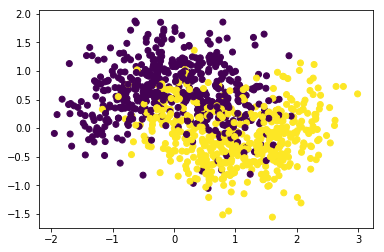

In [13]:

plt.scatter(X[:,0], X[:,1], c=y)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
tree_clf = DecisionTreeClassifier()

In [54]:
param_grid = {'max_depth':[2, 3, 5, 10, 30],
              'min_samples_leaf':[2, 5, 10, 30],
              'max_leaf_nodes': [3, 6, 10, 30],
              'min_samples_split': [2, 5, 10, 30]}

In [55]:
gs_clf = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=5, 
                     verbose=1)

In [56]:
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 5, 10, 30], 'min_samples_leaf': [2, 5, 10, 30], 'max_leaf_nodes': [3, 6, 10, 30], 'min_samples_split': [2, 5, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [57]:
gs_clf.best_score_

0.86

In [58]:
gs_clf.best_params_

{'max_depth': 2,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [115]:
best_tree = DecisionTreeClassifier( max_depth=2, max_leaf_nodes=6, min_samples_leaf=10)

In [116]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [117]:
y_pred = best_tree.predict(X_test)

In [118]:
np.mean(y_pred == y_test)

0.825

In [119]:
from sklearn.model_selection import ShuffleSplit

In [147]:
sh_split = ShuffleSplit(n_splits=1000, test_size=None, train_size=100)

In [128]:
accuracies = []
for tr_ind, _ in sh_split.split(X_train):
    best_tree = DecisionTreeClassifier( max_depth=2, 
                                       max_leaf_nodes=6, 
                                       min_samples_leaf=2)
    best_tree.fit(X_train[tr_ind], y_train[tr_ind])
    preds = best_tree.predict(X_test)
    accuracies.append(np.mean(y_test == preds))
    
print(len(accuracies), np.mean(accuracies))
    

1000 0.797245


In [148]:
preds_array = np.zeros((200, 1000))
i = 0
for tr_ind, _ in sh_split.split(X_train):
    best_tree = DecisionTreeClassifier( max_depth=2, 
                                       max_leaf_nodes=6, 
                                       min_samples_leaf=2)
    best_tree.fit(X_train[tr_ind], y_train[tr_ind])
    preds = best_tree.predict(X_test)
    preds_array[:, i] = preds
    i += 1

In [149]:
from scipy.stats import mode

In [150]:
mode_arr, count_arr = mode(preds_array, axis=1)

In [151]:
np.mean(mode_arr == y_test)

0.4993

In [157]:
np.mean(preds_array[:,343] == y_test)

0.795